# Seaborn:  a high-level interface to Matplotlib

On Seaborn’s official website, they state:
> _If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too._

We’ve found this to be a pretty good summary of Seaborn’s strengths. In practice, the “well-defined set of hard things” includes:
- Using default themes that are aesthetically pleasing.
- Setting custom color palettes.
- Making attractive statistical plots.
- Easily and flexibly displaying distributions.
- Visualizing information from matrices and DataFrames.

Those last three points are why Seaborn is our tool of choice for **Exploratory Analysis**. It makes it very easy to “get to know” your data quickly and efficiently. However, **Seaborn is a complement, not a substitute for Matplotlib**. There are some tweaks that still require Matplotlib, and we’ll cover how to do that as well.

We won’t go into too much detail for any one topic. It’s helpful to have the Seaborn documentation open beside you, in case you want to learn more about a specific feature.

### Step 1: Installing Seaborn
Make sure all requirements are satisfies: 
- Python 3
- Pandas
- Matplotlib
- Seaborn
If you do not have a specific  package you can install it using `pip3 install --user {package_name}`.

### Step 2: Importing libraries and dataset
Let's start by importing Pandas, which is a great library for managing __relational__ (i.e. table-format) datasets:

In [66]:
# Pandas for managing datasets
import pandas as pd

Next, we'll import Matplotlib, which will help us customize our plots further.
Recall from lecture 2 that, you need to include `%matplotlib inline` to display your plots inside your notebook.

In [67]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

Then, we'll import the Seaborn library, which is the star of today's show.

In [68]:
# Seaborn for plotting and styling
import seaborn as sns

Now we're ready to import our dataset.

You should already know this by know, altough we remind it is a good practice to give each library an _alias_. Later, we can invoke Pandas with `pd`, Matplotlib with `plt`, and Seaborn with `sns`.
For the courtesy of the [tutorial](https://elitedatascience.com/python-seaborn-tutorial) from which this one has been adapted, we'll be using a cool Pokémon dataset already available to you in the downloaded folder.
Once you've downloaded the CSV (comma separated values) file, you can import it with Pandas.

In [92]:
# Read dataset

# The argument  index_col=0 simply means we'll treat the first column
# of the dataset as the ID column.
df = pd.read_csv('data/Pokemon.csv', index_col=0, encoding="latin1")

Without any _magical command_, the Jupyter Notebook automatically displays pandas datasets in a pretty tabular format, which greatly helps and improve visualization. Here's what the dataset looks like:

In [93]:
# Display first 5 observations using the method head() of the pandas dataset
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


### Step 3: Seaborn's plotting functions

One of Seaborn's greatest strengths is its diversity of plotting functions. For instance, making a scatter plot is just one line of code using the `lmplot()` function.

There are two ways you can do so.
- The first way (recommended) is to pass your `DataFrame` to the `data=` argument, while passing column names to the axes arguments, `x=` and `y=`.
- The second way is to directly pass in `Series` of data to the axes arguments.
For example, let's compare the Attack and Defense stats for our Pokémon:

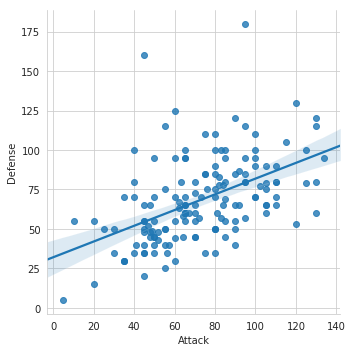

In [71]:
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df);

 
# Alternative way - directly using the series (cols) of data from the dataframe
# sns.lmplot(x=df.Attack, y=df.Defense)

By the way, Seaborn doesn't have a dedicated scatter plot function, which is why you see a diagonal line. We actually used Seaborn's function for fitting and plotting a **regression line**.

Thankfully, each plotting function has several useful options that you can set. Here's how we can tweak the `lmplot()`:
- First, we'll set `fit_reg=False` to remove the regression line, since we only want a scatter plot.
- Then, we'll set `hue='Stage'` to color our points by the Pokémon's evolution stage. This `hue` argument is very useful because it allows you to express a third dimension of information using color.

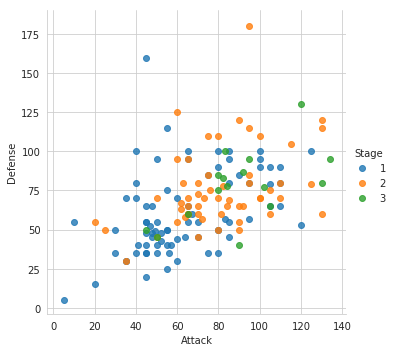

In [72]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False,  # No regression line
           hue='Stage');   # Color by evolution stage

           
Looking better, but we can improve this scatter plot further. For example, all of our Pokémon have positive Attack and Defense values, yet our axes limits fall below zero.

### Step 4: Customizing with Matplotlib
Remember, Seaborn is a high-level interface to Matplotlib. From our experience, Seaborn will get you most of the way there, but you'll sometimes need to bring in Matplotlib.

Setting your axes limits is one of those times, but the process is pretty simple:
- First, invoke your Seaborn plotting function as normal.
- Then, invoke Matplotlib's customization functions. In this case, we'll use its `ylim()` and `xlim()` functions.
Here's our new scatter plot with sensible axes limits:

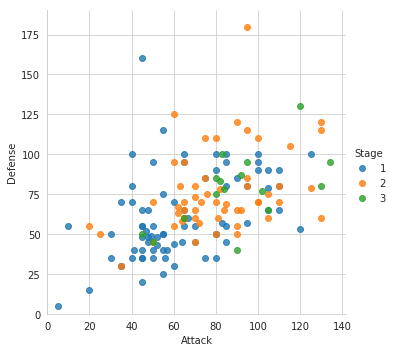

In [73]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')

 # Tweak using Matplotlib MATLAB-like API
plt.ylim(0, None)
plt.xlim(0, None);

### Step 5: The role of Pandas
Even though this is a Seaborn tutorial, Pandas actually plays a very important role. You see, Seaborn's plotting functions benefit from a base DataFrame that's reasonably formatted.

For example, let's say we wanted to make a box plot for our Pokémon's combat stats:

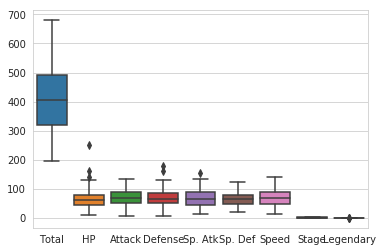

In [74]:
# Boxplot
sns.boxplot(data=df);

Well, that's a reasonable start, but there are some columns we'd probably like to remove:
- we can remove the `Total` since we have individual stats.
- we can remove the `Stage` and `Legendary` columns because they aren't combat stats.

In turns out that this isn't easy to do within Seaborn alone. Instead, it's much simpler to pre-format your `DataFrame`. Let's create a new `DataFrame` called `stats_df` that only keeps the stats columns:

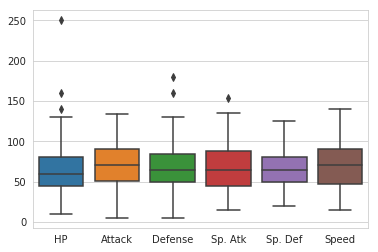

In [75]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df);

It's outside the scope of this tutorial to dive into Pandas, but here's a handy [cheat sheet](http://pandas.pydata.org/pandas-docs/stable/10min.html).

### Step 6: Seaborn themes

Another advantage of Seaborn is that it comes with decent style themes right out of the box. The default theme is called `'darkgrid'`.Next, we'll change the theme to `'whitegrid'` while making a violin plot.

**Violin plots** are useful alternatives to box plots.They show the distribution through the thickness of the violin instead of only the summary statistics.

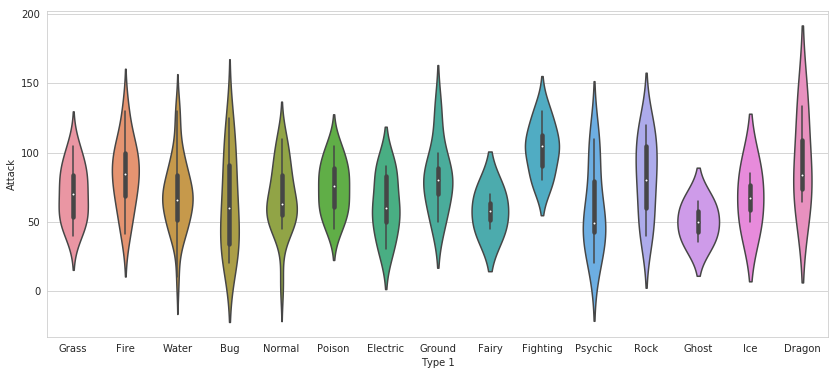

In [76]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df);

# Change figure size using matplotlib
# get current figure first
fig = plt.gcf() 
fig.set_size_inches(14, 6)

As you can see, Dragon types tend to have higher Attack stats than Ghost types, but they also have greater variance. Now, Pokémon fans might find something quite jarring about that plot: The colors are nonsensical. Why is the Grass type colored pink or the Water type colored orange? We must fix this!

### Step 7: Color palettes
Fortunately, Seaborn allows us to set custom color palettes. We can simply create an ordered Python list of color hex values.

Let's use [Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates) to help us create a new color palette:

In [77]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]                   

Now we can simply use the `palette=` argument to recolor our chart.

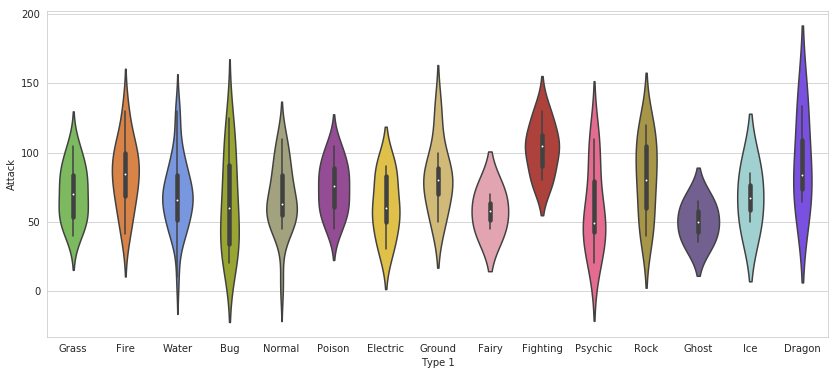

In [78]:
# Set figure size with matplotlib
# alternatively to previous approach you can set the figure size beforehand
plt.figure(figsize=(14,6))

# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette


**Violin plots** are great for visualizing distributions. However, since we only have 151 Pokémon in our dataset, we may want to simply display each point.

That's where the **swarm plot** comes in. This visualization will show each point, while "stacking" those with similar values:

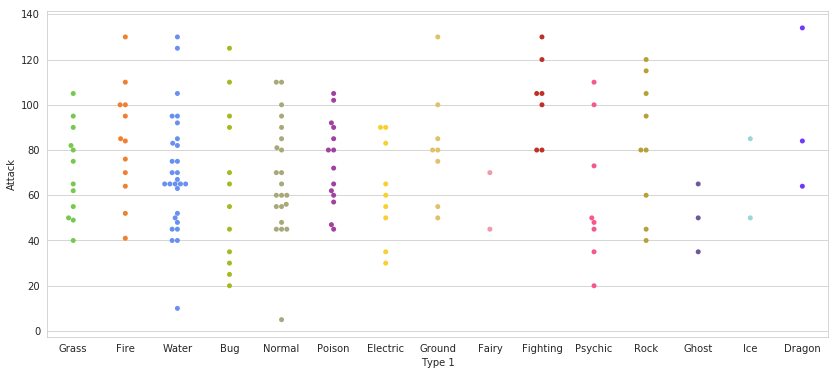

In [79]:
# Set figure size with matplotlib
plt.figure(figsize=(14,6))

# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors);


That's handy, but can't we combine our swarm plot and the violin plot?

### Step 8: Overlaying plots

It's pretty straightforward to overlay plots using Seaborn, and it works the same way as with Matplotlib. Here's what we'll do:
- First, we'll make our figure larger using Matplotlib.
- Then, we'll plot the violin plot. However, we'll set `inner=None` to remove the bars inside the violins.
- Next, we'll plot the swarm plot. This time, we'll make the points black so they pop out more.
- Finally, we'll set a title using Matplotlib.

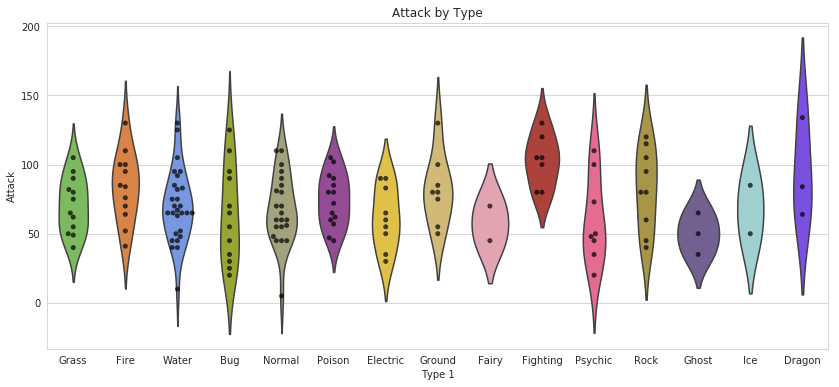

In [80]:
# Set figure size with matplotlib
plt.figure(figsize=(14,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type');

### Step 9: Putting it all together

First, here's a reminder of our data format:

In [81]:
# First 5 rows of stats_dfPython
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


As you can see, all of our stats are in separate columns. Instead, we want to "melt" them into one column.
To do so, we'll use Pandas's `melt()` function. It takes 3 arguments:
1. the `DataFrame` to melt.
2. ID variables to keep (Pandas will melt all other ones except IDs).
3. a name for the new, melted variable.
To understand how `melt()` works look at [this example](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html) from the official pandas documentation. Here is the output for the Pokemons' dataset. 

In [82]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


All 6 of the stat columns have been "melted" into one, and the new Stat column indicates the original stat (HP, Attack, Defense, Sp. Attack, Sp. Defense, or Speed). For example, it's hard to see here, but Bulbasaur now has 6 rows of data. In fact, if you print the shape of these two `DataFrames`:

In [83]:
print( stats_df.shape )
print( melted_df.shape )
# (151, 9)
# (906, 5)

(151, 9)
(906, 5)


Now we can make a swarm plot with `melted_df`.
But this time, we're going to set `x='Stat'` and `y='value'` so our swarms are separated by stat.
Then, we will set `hue='Type 1'` to color our points by the Pokémon type. A default swarmplot would be unreadable:

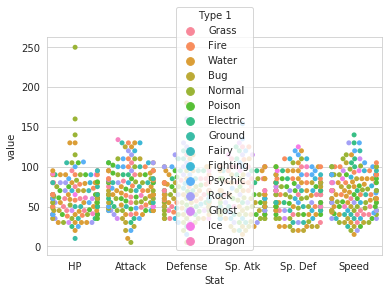

In [84]:
# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1');

Finally, let's make a few final tweaks for a more readable chart:
- Enlarge the plot.
- Separate points by hue using the argument `dodge=True`.
- Use our custom Pokemon color palette.
- Adjust the y-axis limits to end at 0.
- Place the legend to the right.

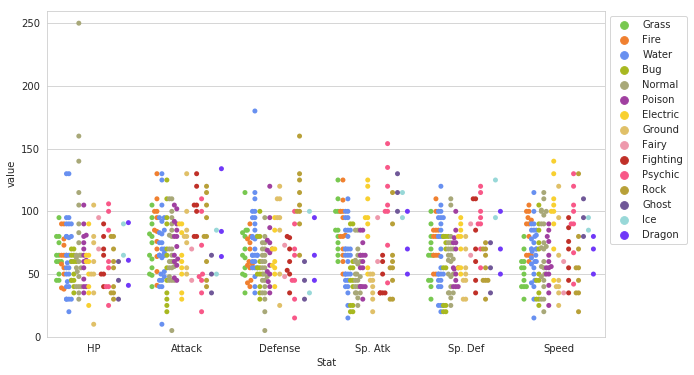

In [85]:
# Customizations
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True,               # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2);

### Step 10: Pokédex (mini-gallery)
We're going to conclude this tutorial with a few quick-fire data visualizations, just to give you a sense of what's possible with Seaborn.

#### 10.1 - Heatmap
**Heatmaps** help you visualize matrix-like data.

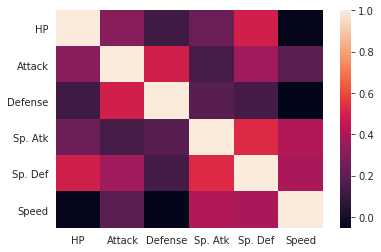

In [86]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr);

#### 10.2 - Histogram
**Histograms** allow you to plot the distributions of numeric variables.

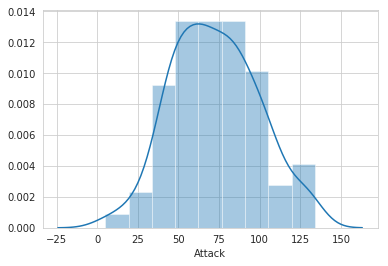

In [87]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack);

#### 10.3 - Bar Plot
**Bar plots** help you visualize the distributions of categorical variables.

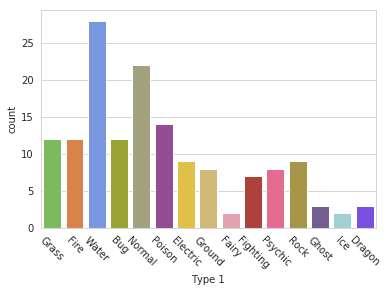

In [88]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45);

#### 10.4 - Categorical Plot
**Categorical plots** make it easy to separate plots by categorical classes.

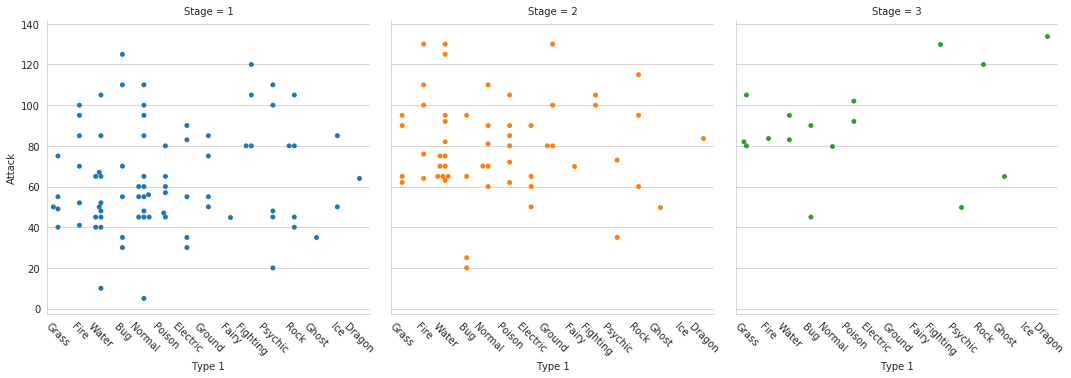

In [89]:
# Factor Plot
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45);
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

#### 10.5 - Density Plot
**Density plots** display the distribution between two variables. Consider overlaying this with a scatter plot.

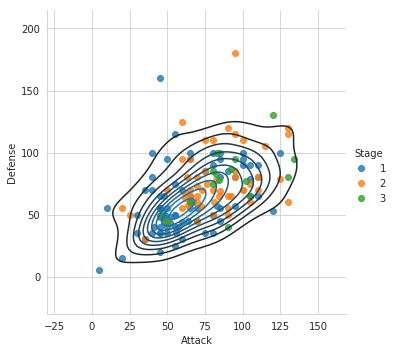

In [90]:
# Density Plot
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
# Density Plot
sns.kdeplot(df.Attack, df.Defense);

#### 10.6 - Joint Distribution Plot
Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

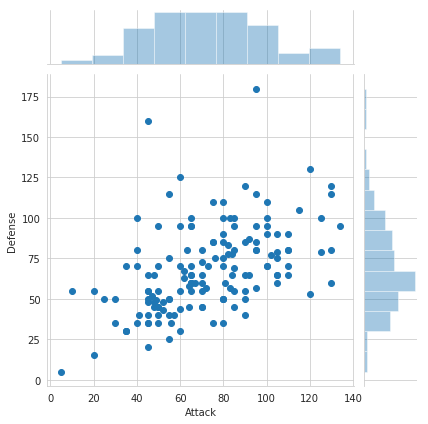

In [91]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df);

Congratulations... you've made it to the end of this Python Seaborn tutorial!

We've just concluded a tour of key Seaborn paradigms and showed you many examples along the way. Many other examples can be found on the [official webpage](https://seaborn.pydata.org/). 

### References

- https://elitedatascience.com/python-seaborn-tutorial